In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
# this is to make it easier to plot image
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()

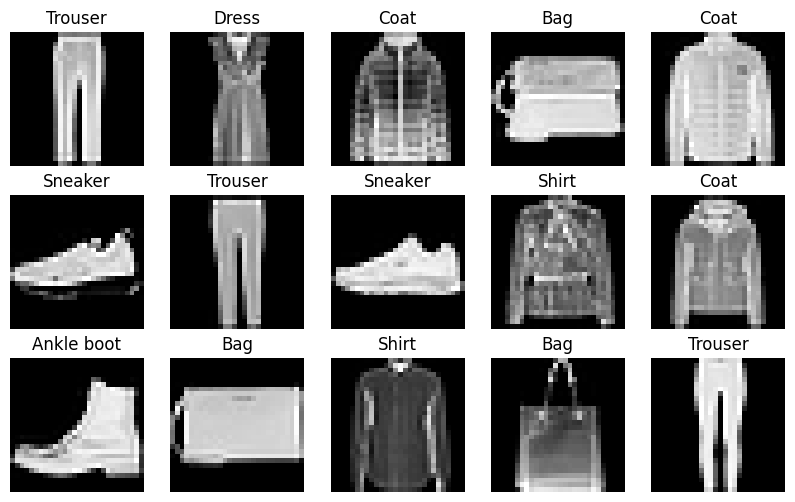

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
class_names = trainset.classes

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(class_names[labels[i].item()])
    ax.axis('off')

plt.show()

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train_model(model, trainloader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        running_loss = 0.0
        for i, (images, labels) in enumerate(trainloader, 1):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader):.4f}')


In [ ]:
def evaluate_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total

In [ ]:
train_model(model, trainloader, criterion, optimizer)

Epoch 1/5, Loss: 0.4568
Epoch 2/5, Loss: 0.2973
Epoch 3/5, Loss: 0.2498
Epoch 4/5, Loss: 0.2206
Epoch 5/5, Loss: 0.1968


In [ ]:
accuracy = evaluate_model(model, testloader)
print(f'CNN Accuracy: {accuracy:.4f}')

CNN Accuracy: 0.9104
